[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Feb  4 13:00:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.1.2+cpu CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)
Setup complete  (8 CPUs, 15.8 GB RAM, 195.7/206.1 GB disk)


In [3]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML


Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.1.2+cpu CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 110.2ms
Speed: 10.0ms preprocess, 110.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict2
 Learn more at https://docs.ultralytics.com/modes/predict


D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML


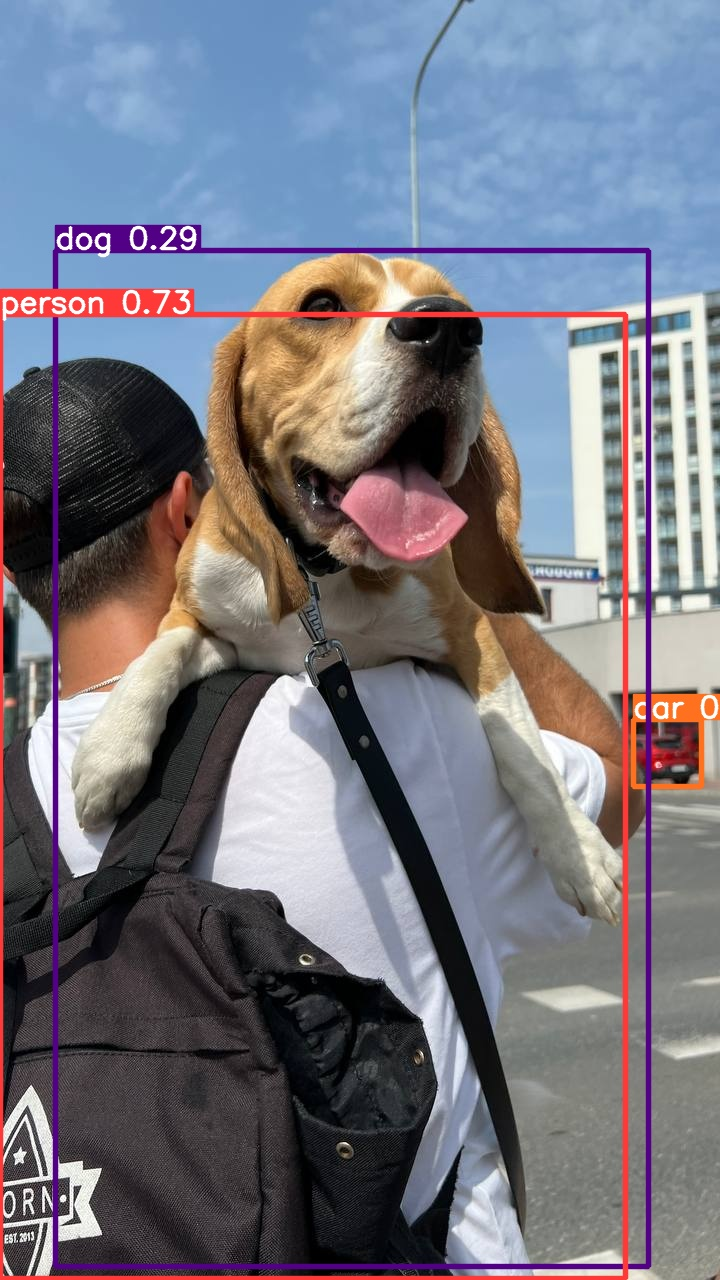

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 103.2ms
Speed: 1.8ms preprocess, 103.2ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0539,  786.0336]])

In [10]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TjnlWvmLJK6crkGzgmn2")
project = rf.workspace("hi-wxm96").project("p-a4mbm")
dataset = project.version(1).download("yolov8-obb")

[WinError 2] The system cannot find the file specified: 'D:\\Projects\\0 WORK\\Smart road condition checker\\smart-road-condition-checker\\ML/datasets'
D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML


The syntax of the command is incorrect.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...


In [18]:
import os

def list_files_and_directories(directory_path):
    for root, dirs, files in os.walk(directory_path):
        print(f"Current directory: {root}")

        # List directories
        print("Directories:")
        for directory in dirs:
            print(os.path.join(root, directory))

        # List files
        print("Files:")
        for file in files:
            print(os.path.join(root, file))

# Replace 'your_directory_path' with the actual path you want to check
directory_path = './datasets/roboflow'
list_files_and_directories(directory_path)

#file_path = {dataset.location} / 'data.yaml'

def show_file_content(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            print(content)
    except FileNotFoundError:
        print(f"Error: File not found - {file_path}")
    except Exception as e:
        print(f"Error: {e}")

# Replace 'your_file_path' with the actual path to the file you want to read
file_path = '../datasets/roboflow'
#show_file_content(file_path)

Current directory: ./datasets/roboflow
Directories:
./datasets/roboflow\test
./datasets/roboflow\train
./datasets/roboflow\valid
Files:
./datasets/roboflow\data.yaml
./datasets/roboflow\README.dataset.txt
./datasets/roboflow\README.roboflow.txt
Current directory: ./datasets/roboflow\test
Directories:
./datasets/roboflow\test\images
./datasets/roboflow\test\labels
Files:
Current directory: ./datasets/roboflow\test\images
Directories:
Files:
./datasets/roboflow\test\images\105_jpg.rf.469ae9ab85071ee9ef82551983eae116.jpg
./datasets/roboflow\test\images\108_jpg.rf.984d35879b6e4be87655c3f5ceee8ef9.jpg
./datasets/roboflow\test\images\112_jpg.rf.2ff33cc86569fc9e8a54b389a6235e1f.jpg
./datasets/roboflow\test\images\144_jpg.rf.2915a910e518a4cdf45d85c1f0c165cd.jpg
./datasets/roboflow\test\images\148_jpg.rf.342e069eecafdfce753d603d54784151.jpg
./datasets/roboflow\test\images\153_jpg.rf.055ae70febf0c0dc58da527dc6f78516.jpg
./datasets/roboflow\test\images\154_jpg.rf.abf0a324718b18332ea2c408af4586c5.

In [20]:
source = dataset.location


destination = './datasets/roboflow'

import os


# Create the destination directory if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Copy files from source to destination
!cp -r $source/* $destination



# Specify the current file name and the new file name
current_filename = 'old_file.txt'  # replace with the actual current file name
new_filename = 'new_file.txt'      # replace with the desired new file name

# Rename the file
#os.rename(current_filename, new_filename)


cp: cannot stat `D:\\Projects\\0': No such file or directory
cp: cannot stat `WORK\\Smart': No such file or directory
cp: cannot stat `road': No such file or directory
cp: cannot stat `condition': No such file or directory
cp: cannot stat `checkersmart-road-condition-checkerMLp-1/*': No such file or directory


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data="{HOME}/datasets/roboflow/data.yaml" epochs=25 imgsz=800 plots=True

D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png		train_batch151.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch152.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1707051710.3a7d18a96695.1165.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch150.jpg	weights


/content


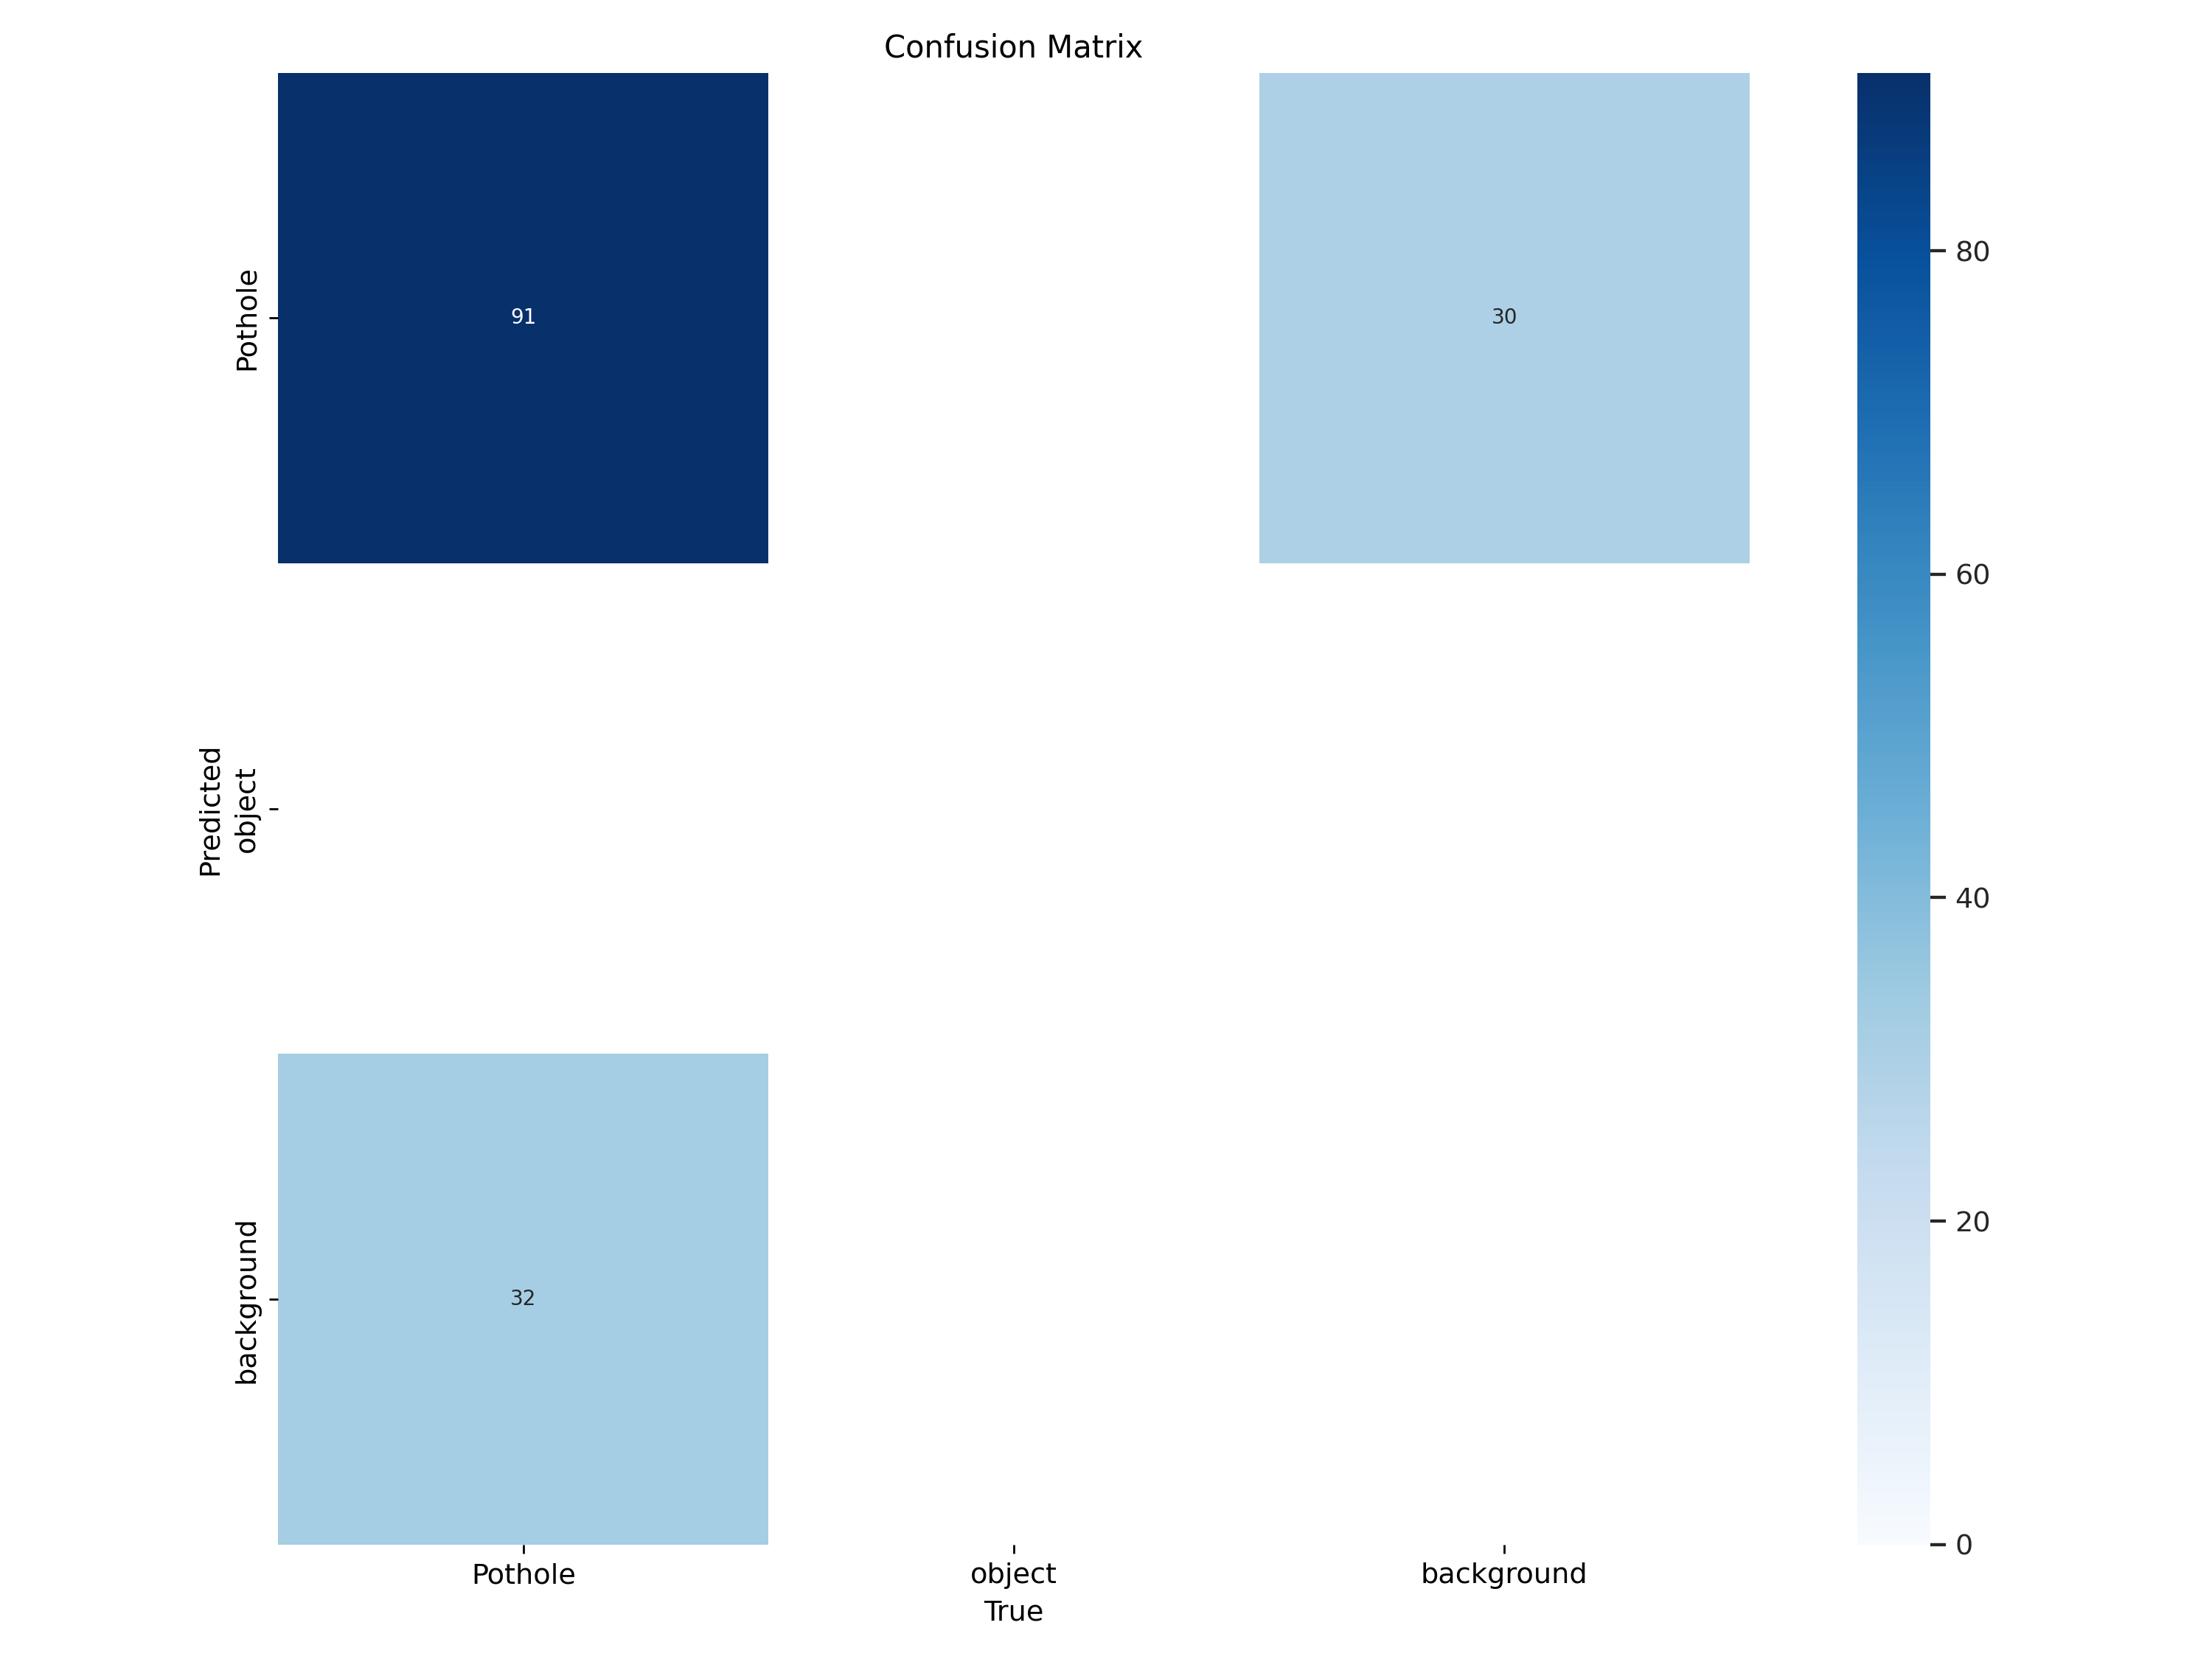

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


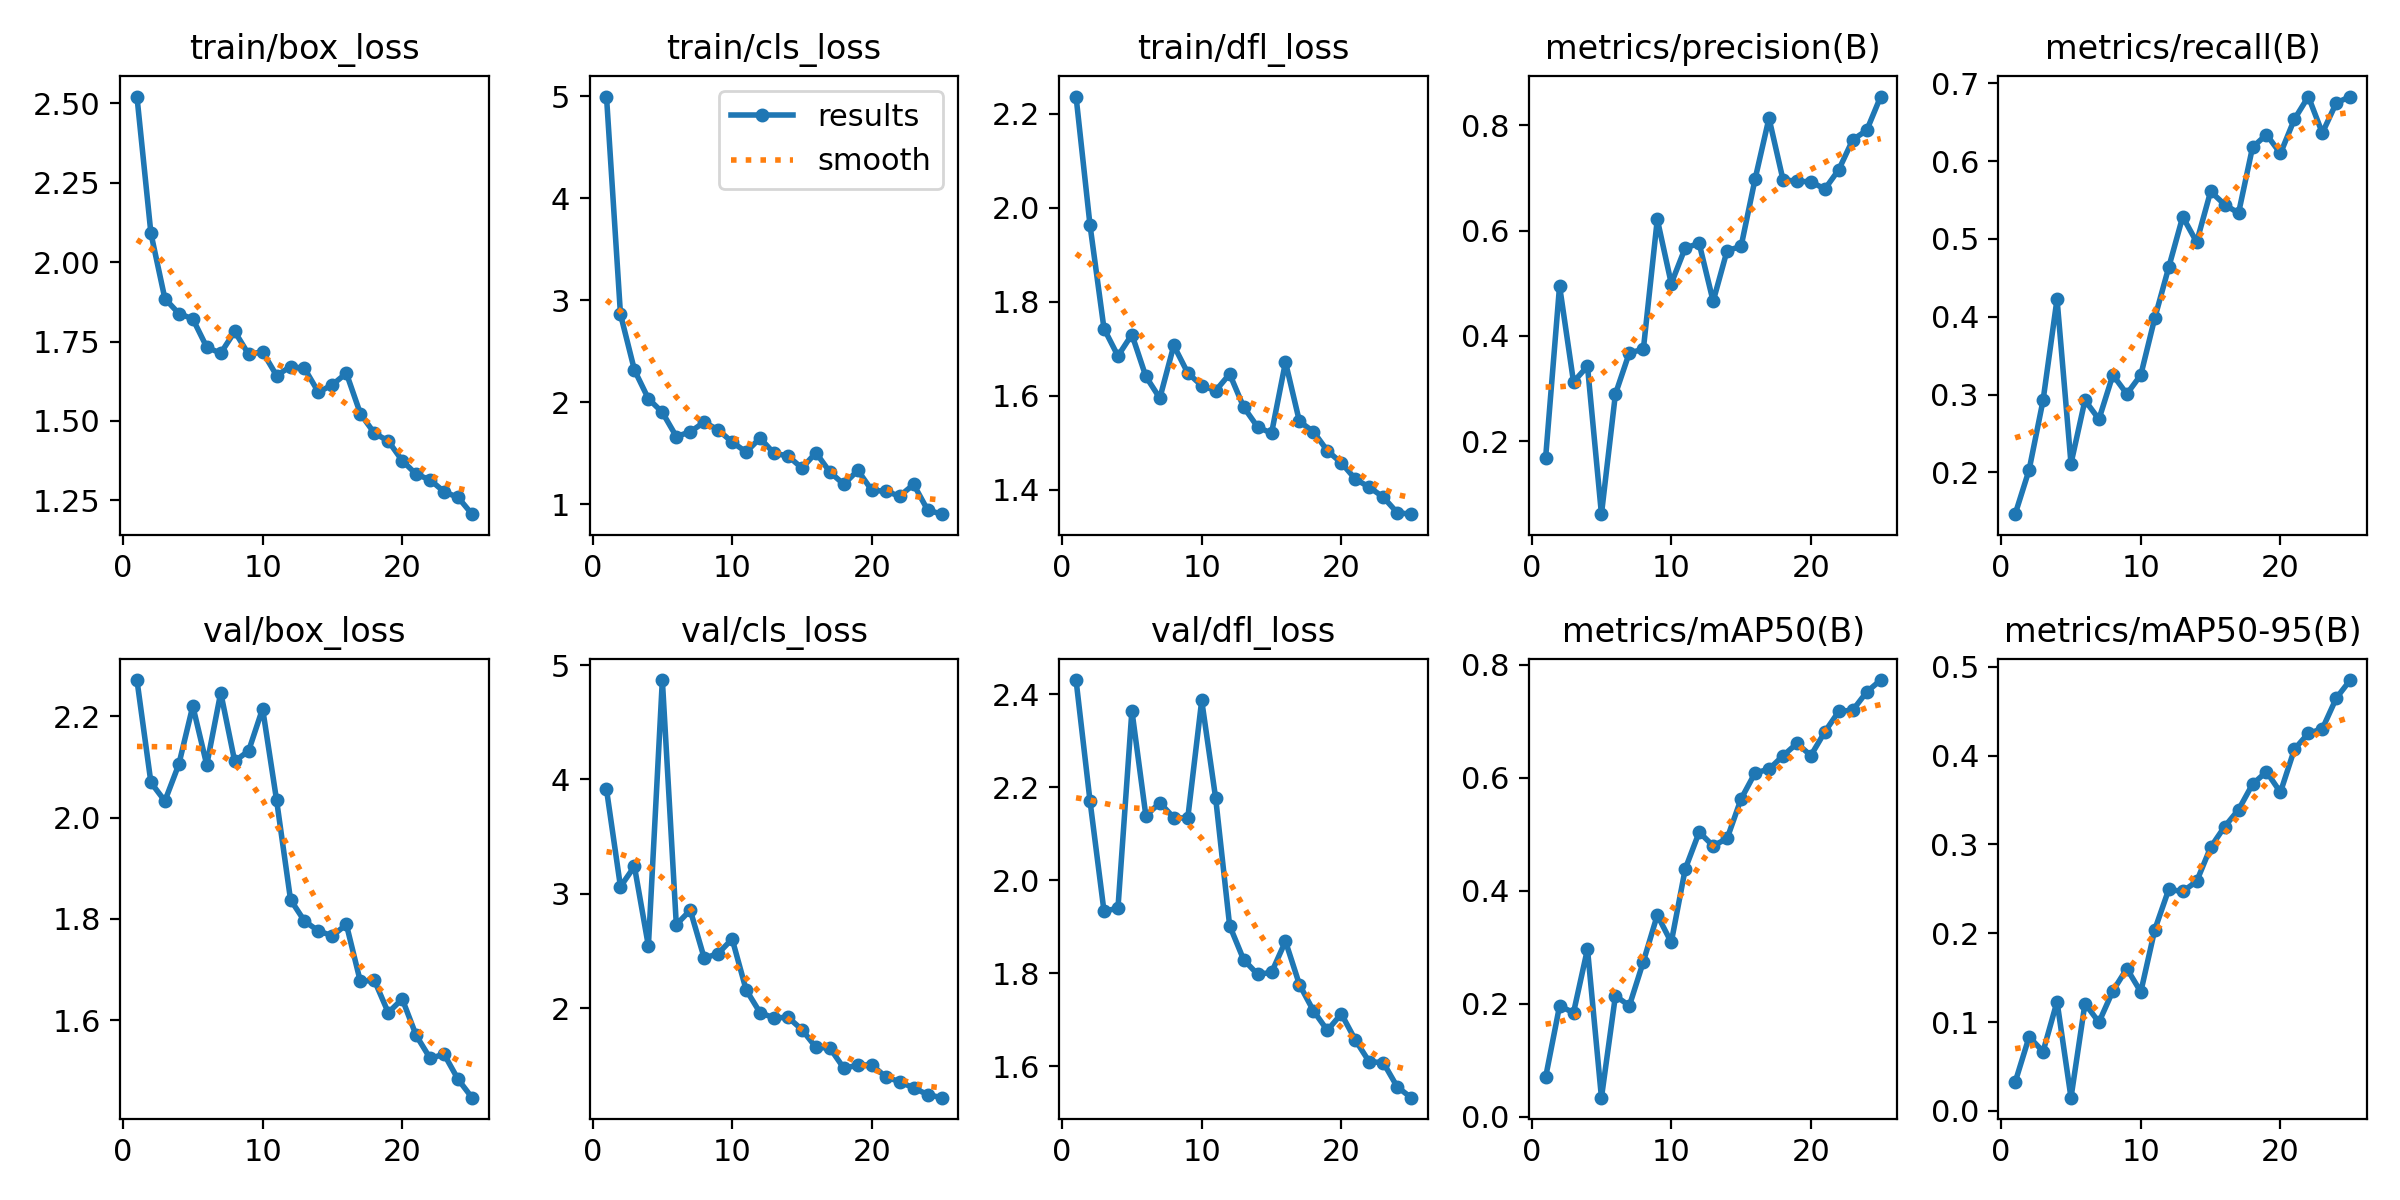

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


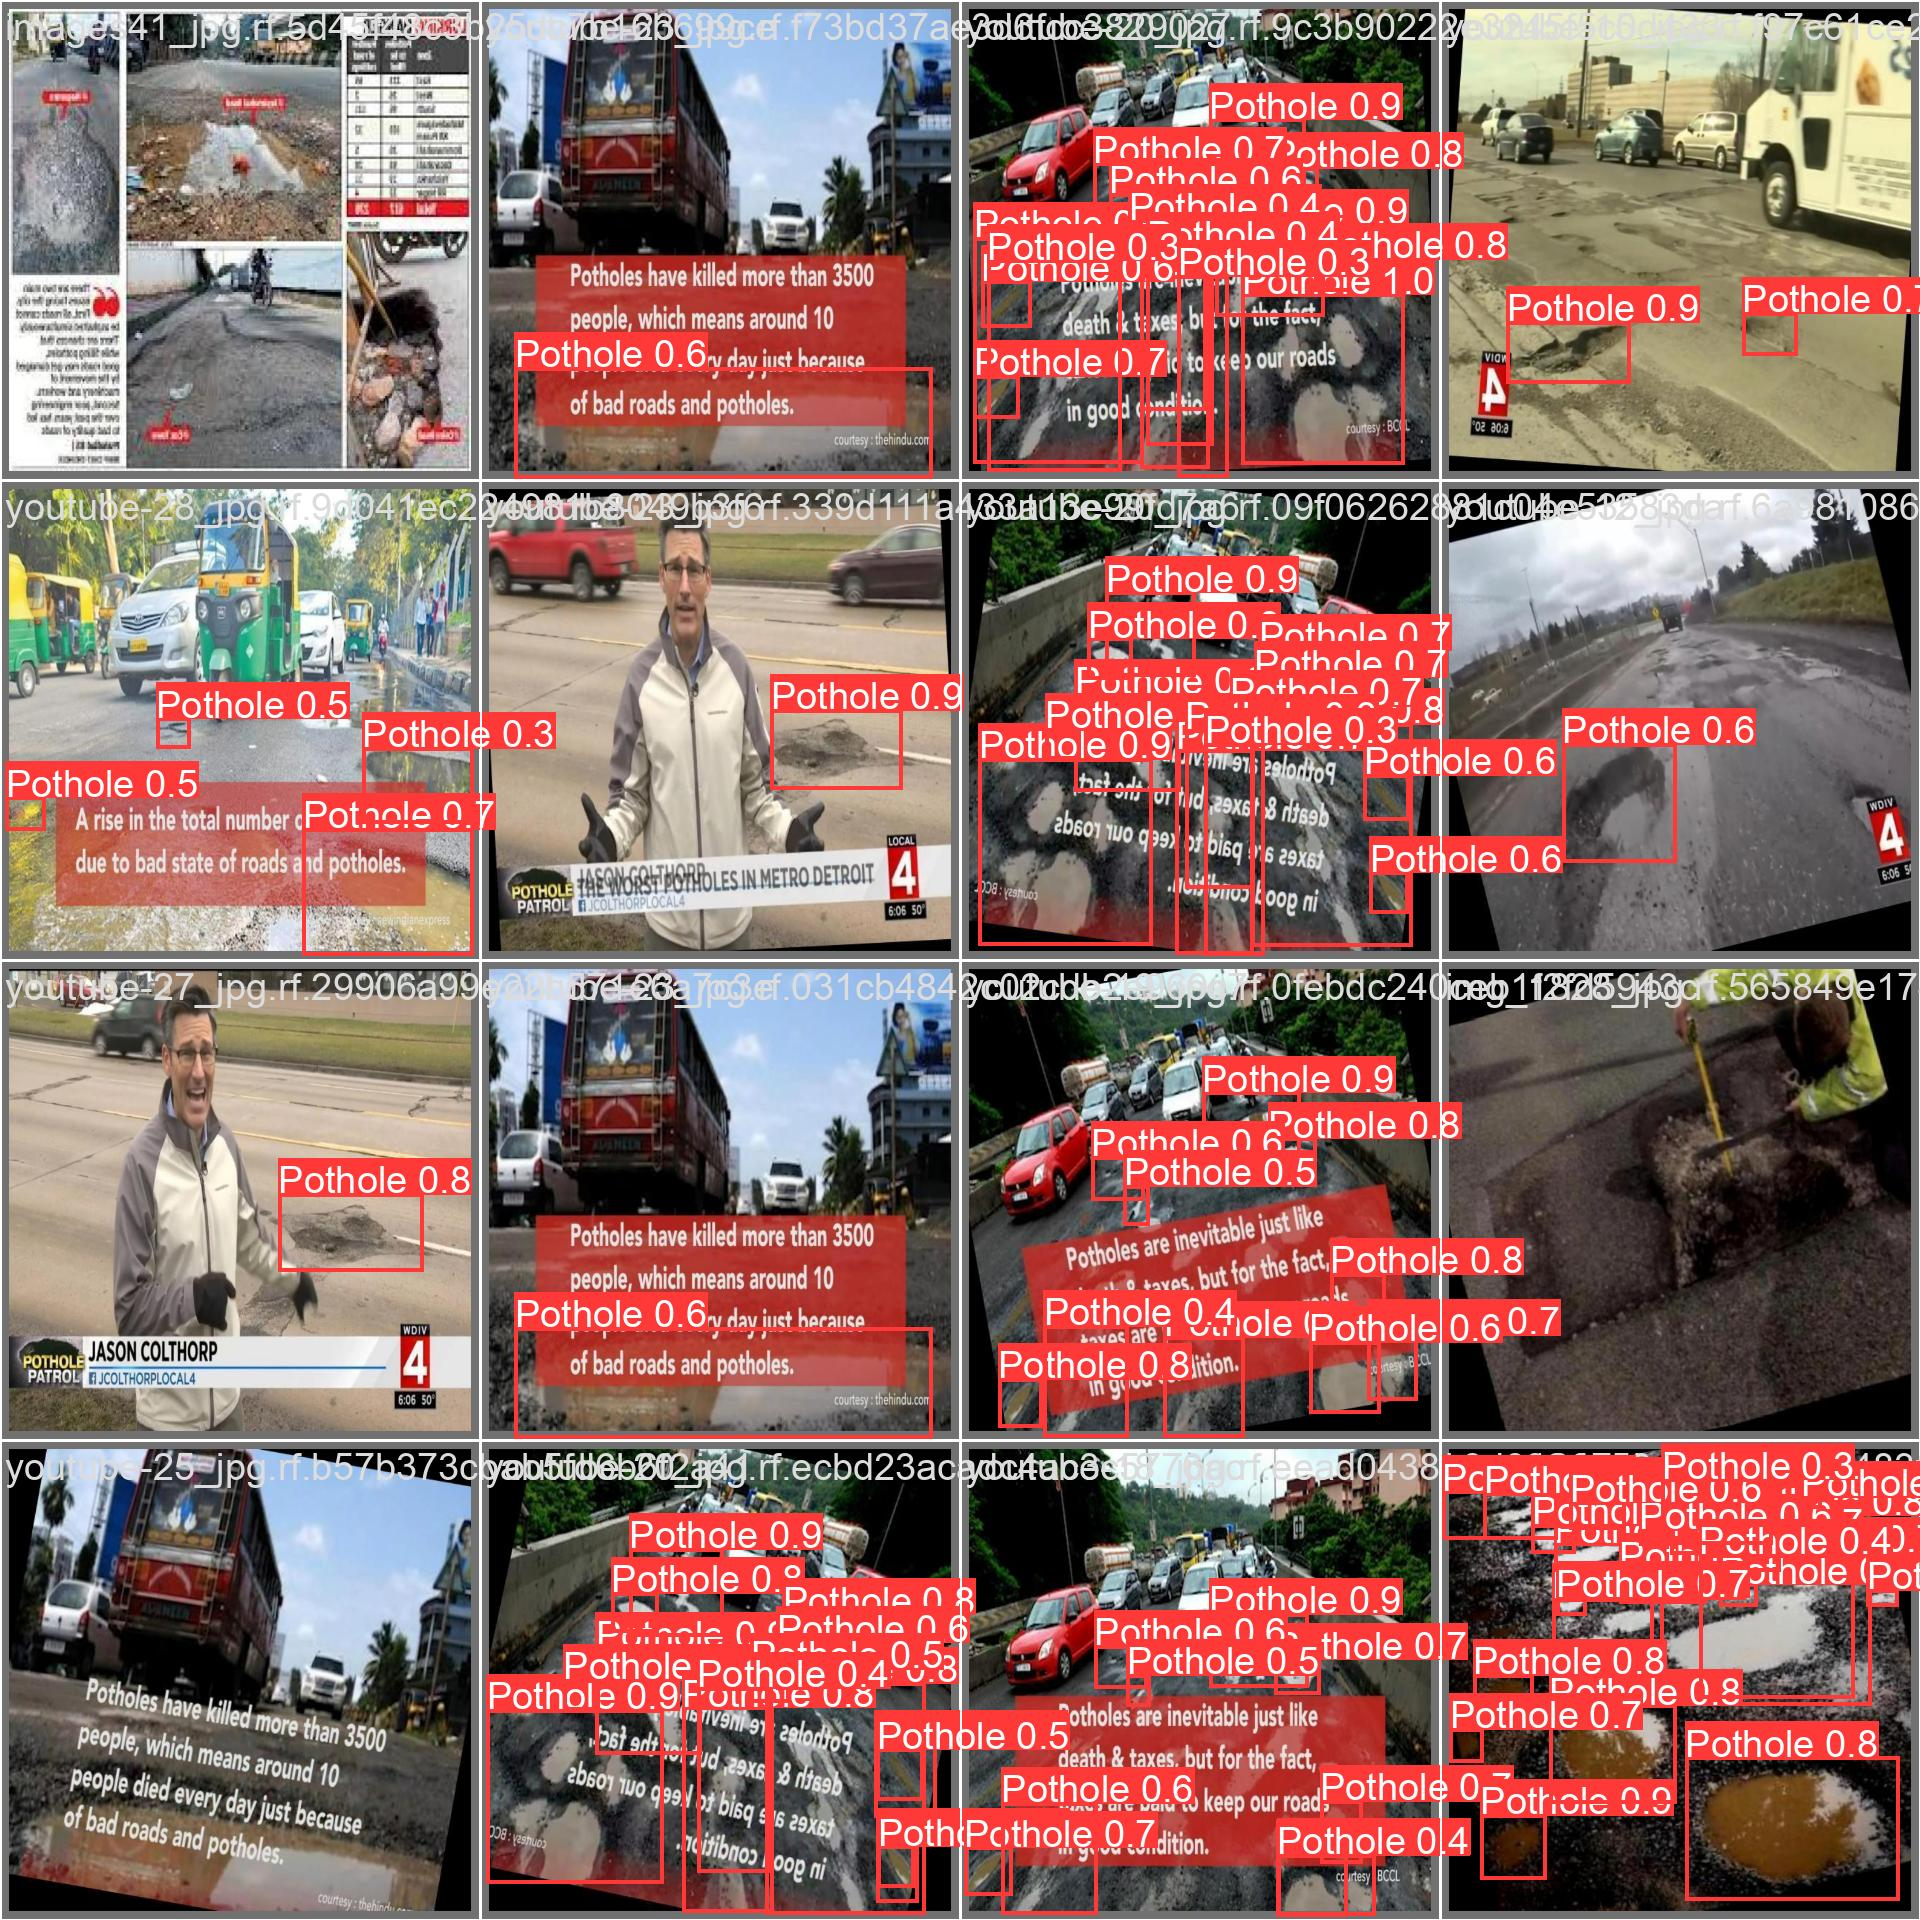

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/roboflow/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.30s/it]
                   all         26        123      0.855      0.683      0.773      0.486
               Pothole         26        123      0.855      0.683      0.773      0.486
Speed: 0.4ms preprocess, 30.8ms inference, 0.0ms loss, 27.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='https://www.youtube.com/watch?v=hziQkiCVqSM&t=22s' save=True
!yolo track model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='test.mp4' show

/content
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/692) /content/test.mp4: 480x800 4 Potholes, 143.9ms
video 1/1 (2/692) /content/test.mp4: 480x800 4 Potholes, 15.6ms
video 1/1 (3/692) /content/test.mp4: 480x800 2 Potholes, 15.7ms
video 1/1 (4/692) /content/test.mp4: 480x800 3 Potholes, 15.8ms
video 1/1 (5/692) /content/test.mp4: 480x800 3 Potholes, 15.7ms
video 1/1 (6/692) /content/test.mp4: 480x800 4 Potholes, 15.7ms
video 1/1 (7/692) /content/test.mp4: 480x800 4 Potholes, 15.6ms
video 1/1 (8/692) /content/test.mp4: 480x800 1 Pothole, 15.6ms
video 1/1 (9/692) /content/test.mp4: 480x800 1 Pothole, 15.7ms
video 1/1 (10/692) /content/test.mp4: 480x800 1 Pothole, 15.6ms
video 1/1 (11/692) /content/test.mp4: 480x800 1 Pothole, 15.7ms
vi

**NOTE:** Let's take a look at few results.

In [ ]:
import os
import base64
from IPython.display import HTML

def convert_avi_to_mp4(avi_path, mp4_path):
    # Convert AVI to MP4 using ffmpeg
    os.system(f"ffmpeg -i {avi_path} -c:v libx264 -crf 23 {mp4_path}")

def display_video(video_path):
    # Check if the video file exists
    if not os.path.exists(video_path):
        print(f"Error: Video file '{video_path}' not found.")
        return

    # Convert AVI to MP4
    mp4_path = video_path.replace('.avi', '.mp4')
    convert_avi_to_mp4(video_path, mp4_path)

    # Read the MP4 video file
    with open(mp4_path, 'rb') as f:
        video_data = f.read()

    # Encode the video data to base64
    video_encoded = base64.b64encode(video_data).decode('utf-8')

    # Display the video using HTML
    display_html = f'<video controls alt="Your browser does not support the video tag." src="data:video/mp4;base64,{video_encoded}">'
    display(HTML(display_html))

    # Remove the temporary MP4 file
    os.remove(mp4_path)

# Replace 'your_video.avi' with the path to your AVI video file
video_path_avi = 'runs/detect/predict2/test.avi'
display_video(video_path_avi)

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.